# <center> Streaming Platform Analyse</center>

**Contexte** :


**Objectifs** :

---

### Plan :




---

## Amazon - Movies and TV Shows
---

**Amazon Prime is another one of the most popular media and video streaming platforms. They have close to 10000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.**


Dataset contains 12 columns:

    1. show_id: Unique ID for every Movie / Tv Show
    2. type: A Movie or TV Show
    3. title: Title of the Movie / Tv Show
    4. director: Director of the Movie
    5. cast: Actors involved in the Movie / Show
    6. country: Country where the movie / show was produced
    7. date_added: Date it was added on Netflix
    8. release_year: Actual Release year of the move / show
    9. rating: TV Rating of the movie / show
    10. duration: Total Duration - in minutes or number of seasons
    11. listed_in: Genre of the Movie/TV Show
    12. description: Summary of the Movie/TV Show



### Load dataset

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('data/amazon_prime_titles.csv')
data = data.set_index('show_id')

In [4]:
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


### Quick describe

In [5]:
# netflix_df.shape  # number of rows and features

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9668 entries, s1 to s9668
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          9668 non-null   object
 1   title         9668 non-null   object
 2   director      7585 non-null   object
 3   cast          8435 non-null   object
 4   country       672 non-null    object
 5   date_added    155 non-null    object
 6   release_year  9668 non-null   int64 
 7   rating        9331 non-null   object
 8   duration      9668 non-null   object
 9   listed_in     9668 non-null   object
 10  description   9668 non-null   object
dtypes: int64(1), object(10)
memory usage: 906.4+ KB


In [6]:
duplicate_rows_df = data[data.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 11)


In [7]:
data.isnull().sum() # checking for Na/Null values

type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

There are some null values in the `director`,  `cast`,  `countries`, `date_added` and `rating` variables. 

In [18]:
print(data.rating.nunique())
data.rating.unique()

24


array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', 'UNRATED', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES',
       'NOT_RATE'], dtype=object)

In [19]:
dt = data.copy()

dt['rating'] = dt['rating'].replace('UNRATED', float('nan')).replace('NOT_RATE', float('nan'))
print(dt.rating.nunique())
dt.rating.unique()

22


array([nan, '13+', 'ALL', '18+', 'R', 'TV-Y', 'TV-Y7', 'NR', '16+',
       'TV-PG', '7+', 'TV-14', 'TV-NR', 'TV-G', 'PG-13', 'TV-MA', 'G',
       'PG', 'NC-17', '16', 'AGES_16_', 'AGES_18_', 'ALL_AGES'],
      dtype=object)

In [36]:
dt.date_added.unique()

array(['March 30, 2021', 'April 1, 2021', 'April 4, 2021',
       'April 10, 2021', 'April 17, 2021', 'April 24, 2021',
       'May 2, 2021', 'June 3, 2021', nan, 'April 13, 2021',
       'April 20, 2021', 'April 26, 2021', 'April 27, 2021',
       'April 30, 2021', 'May 1, 2021', 'May 9, 2021', 'May 11, 2021',
       'May 12, 2021', 'May 13, 2021', 'May 18, 2021', 'May 19, 2021',
       'May 22, 2021', 'May 24, 2021', 'May 29, 2021', 'June 4, 2021',
       'June 11, 2021', 'June 12, 2021', 'June 15, 2021', 'June 18, 2021',
       'June 20, 2021', 'June 21, 2021', 'June 22, 2021', 'June 23, 2021',
       'June 24, 2021', 'June 25, 2021', 'June 26, 2021', 'June 29, 2021',
       'July 1, 2021', 'July 3, 2021', 'July 8, 2021', 'July 12, 2021',
       'July 16, 2021', 'July 17, 2021', 'July 20, 2021', 'July 23, 2021',
       'July 24, 2021', 'July 26, 2021', 'July 27, 2021',
       'August 1, 2021', 'August 4, 2021', 'August 6, 2021',
       'August 14, 2021', 'August 15, 2021', 'August 1

In [48]:
def cleaning(dt: pd.DataFrame):
    df = dt.copy()
    df.drop(['director','cast'],axis = 1,inplace = True)
    
    # df.dropna(axis=0, subset=['date_added'], inplace=True)
    
    df['rating'] = df['rating'].replace('UNRATED', float('nan')).replace('NOT_RATE', float('nan'))
    df['rating'] = df['rating'].fillna(df['rating'].mode().iloc[0])
    df['country'] = df['country'].fillna(df['country'].mode().iloc[0])
    df['date_added'] = df['date_added'].fillna(df['date_added'].mode().iloc[0])

    return df

data_cleaned = cleaning(data)
data_cleaned.isnull().sum() # checking for Na/Null values


type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [38]:
data_cleaned.shape

(9668, 9)

### Some Data explo + Feature engeenering

In [39]:
data_cleaned['type'].unique()


array(['Movie', 'TV Show'], dtype=object)

In [41]:
data_cleaned['type'].value_counts()

type
Movie      7814
TV Show    1854
Name: count, dtype: int64

#### Feature 2: Country

In [42]:
# netflix_df['type'].plot(kind='bar', stacked=True)
temp_df = data['country'].value_counts()
temp_df

country
United States                            253
India                                    229
United Kingdom                            28
Canada                                    16
United Kingdom, United States             12
                                        ... 
United States, Germany, Brazil, Italy      1
South Africa                               1
Australia, United States, Germany          1
Germany, Austria, United States            1
Italy, Spain                               1
Name: count, Length: 86, dtype: int64

In [43]:
# netflix_df.groupby(['rating']).size().reset_index(name='count').sort_values(by='count', ascending=False)
data['rating'].value_counts()

rating
13+         2117
16+         1547
ALL         1268
18+         1243
R           1010
PG-13        393
7+           385
PG           253
NR           223
TV-14        208
TV-PG        169
TV-NR        105
G             93
TV-G          81
TV-MA         77
TV-Y          74
TV-Y7         39
UNRATED       33
NC-17          3
AGES_18_       3
NOT_RATE       3
AGES_16_       2
16             1
ALL_AGES       1
Name: count, dtype: int64

In [44]:
data['listed_in'].value_counts()

listed_in
Drama                                                                            986
Comedy                                                                           536
Drama, Suspense                                                                  399
Comedy, Drama                                                                    377
Animation, Kids                                                                  356
                                                                                ... 
Arts, Entertainment, and Culture, Music Videos and Concerts, Special Interest      1
Arts, Entertainment, and Culture, Comedy, Military and War                         1
Comedy, Faith and Spirituality, Kids                                               1
Arts, Entertainment, and Culture, Fantasy, Kids                                    1
Anime, Comedy, Drama                                                               1
Name: count, Length: 518, dtype: int64

In [49]:
data_cleaned['date_added']

show_id
s1       March 30, 2021
s2       March 30, 2021
s3       March 30, 2021
s4       March 30, 2021
s5       March 30, 2021
              ...      
s9664    March 30, 2021
s9665    March 30, 2021
s9666    March 30, 2021
s9667    March 30, 2021
s9668    March 30, 2021
Name: date_added, Length: 9668, dtype: object

In [50]:
def feature_eng(data: pd.DataFrame, cols_to_explode: list = ['country', 'listed_in'] ) -> pd.DataFrame:
    df = data.copy()
    # first explode celll with multiple values
    for col in cols_to_explode:
        print(f"--> Processing col: '{col}'")
        df[col]  = df[col].str.split(",")
        df = df.explode(column=col)
        df[col]  = df[col].str.strip()
    
    # rename list_in to Genre
    df = df.rename(columns={'listed_in':'Genre'})
    
    # set cols type
    df["type"] = df["type"].astype("category")
    df["country"] = df["country"].astype("category")
    df["Genre"] = df["Genre"].astype("category")
    df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format="mixed")  # or format="mixed"
    
    # process duration
    print(f"--> Processing col: 'duration'")
    def ftc(row):
        duration = row["duration"] if row['type'] == 'Movie' else 10*45*int(row["duration"])
        return duration
    df['duration']=df['duration'].str.replace(' min','')
    df['duration']=df['duration'].str.replace(' Seasons','').str.replace(' Season','')
    df["duration"] = df["duration"].astype("int")
    df['duration'] = df.apply(lambda row: ftc(row),axis=1)
    
    return df


data_processed = feature_eng(data_cleaned)
data_processed.shape

--> Processing col: 'country'
--> Processing col: 'listed_in'
--> Processing col: 'duration'


(18635, 9)

In [51]:
data_processed

,type,title,country,date_added,release_year,rating,duration,Genre,description
show_id,,,,,,,,,
s1,Movie,The Grand Seduction,Canada,2021-03-30,2014,13+,113,Comedy,A small fishing village must procure a local d...
s1,Movie,The Grand Seduction,Canada,2021-03-30,2014,13+,113,Drama,A small fishing village must procure a local d...
s2,Movie,Take Care Good Night,India,2021-03-30,2018,13+,110,Drama,A Metro Family decides to fight a Cyber Crimin...
s2,Movie,Take Care Good Night,India,2021-03-30,2018,13+,110,International,A Metro Family decides to fight a Cyber Crimin...
s3,Movie,Secrets of Deception,United States,2021-03-30,2017,13+,74,Action,After a man discovers his wife is cheating on ...
...,...,...,...,...,...,...,...,...,...
s9667,TV Show,Maradona: Blessed Dream,United States,2021-03-30,2021,TV-MA,450,Drama,"The series tells the story of Diego Maradona, ..."
s9667,TV Show,Maradona: Blessed Dream,United States,2021-03-30,2021,TV-MA,450,Sports,"The series tells the story of Diego Maradona, ..."
s9668,Movie,Harry Brown,United States,2021-03-30,2010,R,103,Action,"Harry Brown, starring two-time Academy Award w..."


In [21]:
data_processed[data_processed['type']!='Movie']

,type,title,country,date_added,release_year,rating,duration,Genre,description
show_id,,,,,,,,,
s5,TV Show,The Beatles: Get Back,United States,2021-11-25,2021,TV-G,450,Docuseries,A three-part documentary from Peter Jackson ca...
s5,TV Show,The Beatles: Get Back,United States,2021-11-25,2021,TV-G,450,Historical,A three-part documentary from Peter Jackson ca...
s5,TV Show,The Beatles: Get Back,United States,2021-11-25,2021,TV-G,450,Music,A three-part documentary from Peter Jackson ca...
s7,TV Show,Hawkeye,United States,2021-11-24,2021,TV-14,450,Action-Adventure,Clint Barton/Hawkeye must team up with skilled...
s7,TV Show,Hawkeye,United States,2021-11-24,2021,TV-14,450,Superhero,Clint Barton/Hawkeye must team up with skilled...
...,...,...,...,...,...,...,...,...,...
s1418,TV Show,X-Men: Evolution,United States,2019-11-12,2000,TV-Y7,1800,Animation,X-Men: Evolution features the team as teenager...
s1418,TV Show,X-Men: Evolution,United States,2019-11-12,2000,TV-Y7,1800,Kids,X-Men: Evolution features the team as teenager...
s1435,TV Show,Smart Guy,United States,2019-10-01,1996,TV-G,1350,Comedy,A genius tries to fit in as a high school soph...


In [22]:
data_cleaned[data_cleaned['type']!='Movie']

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s5,TV Show,The Beatles: Get Back,United States,"November 25, 2021",2021,TV-G,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...
s7,TV Show,Hawkeye,United States,"November 24, 2021",2021,TV-14,1 Season,"Action-Adventure, Superhero",Clint Barton/Hawkeye must team up with skilled...
s8,TV Show,Port Protection Alaska,United States,"November 24, 2021",2015,TV-14,2 Seasons,"Docuseries, Reality, Survival",Residents of Port Protection must combat volat...
s9,TV Show,Secrets of the Zoo: Tampa,United States,"November 24, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",A day in the life at ZooTampa is anything but ...
s14,TV Show,"Dr. Oakley, Yukon Vet",United States,"November 17, 2021",2013,TV-PG,10 Seasons,"Action-Adventure, Animals & Nature, Docuseries","Meet Dr. Michelle Oakley, vet to pretty much e..."
...,...,...,...,...,...,...,...,...,...
s1407,TV Show,Wild Yellowstone,Germany,"November 12, 2019",2015,TV-PG,1 Season,"Animals & Nature, Docuseries, Travel",Wild Yellowstone captures the beauty and essen...
s1413,TV Show,Wizards of Waverly Place,United States,"November 12, 2019",2007,TV-G,4 Seasons,"Comedy, Coming of Age, Fantasy","Alex, Justin, and Max Russo are not your ordin..."
s1415,TV Show,Wolverine and The X-Men,United States,"November 12, 2019",2008,TV-Y7,1 Season,"Action-Adventure, Animation, Kids",Wolverine and the X-Men must join together to ...


### Data viz

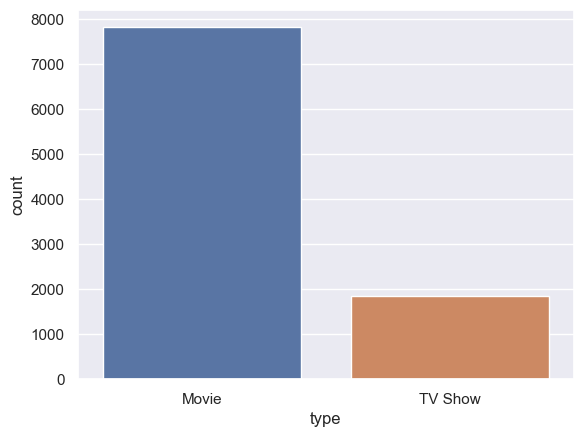

In [52]:
import plotly.express as px
import seaborn as sns

sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=data, hue='type')

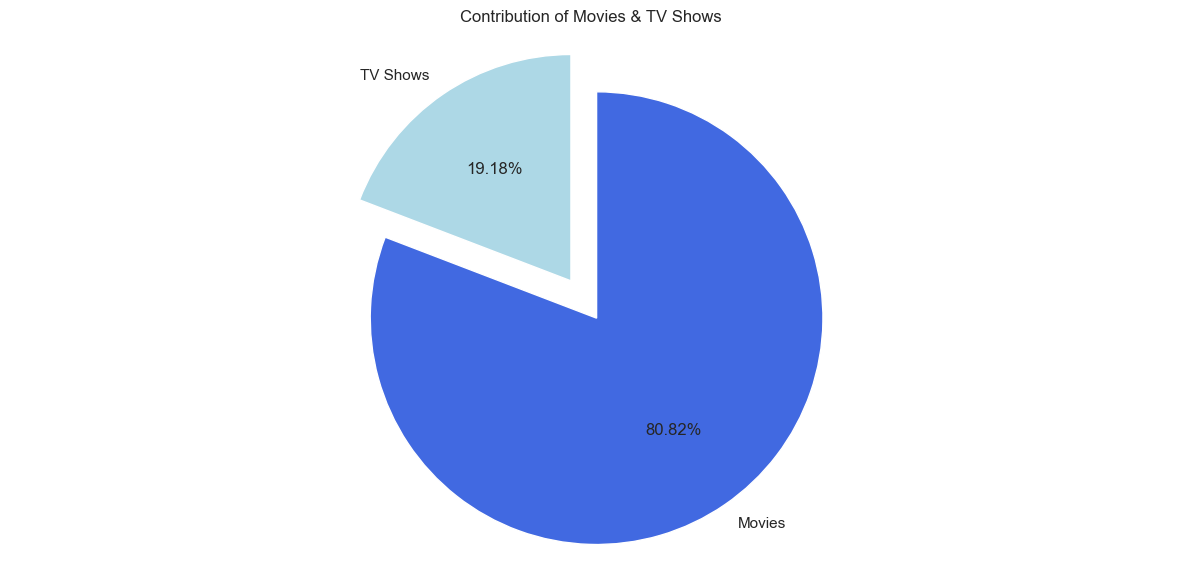

In [53]:


plt.figure(figsize=(15, 7))
labels=['TV Shows', 'Movies']
plt.pie(data['type'].value_counts().sort_values(),
        labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',
        colors=['lightblue','royalblue'], startangle = 90)

plt.title('Contribution of Movies & TV Shows')
plt.axis('equal')
plt.show()



Text(0.5, 1.0, 'Most of Top 7 shows are released based on rating')

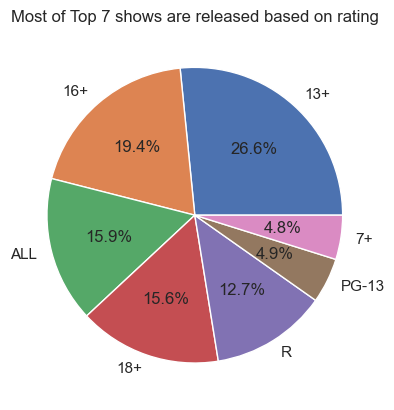

In [54]:
plt.pie(data['rating'].value_counts().head(7),
        labels=data['rating'].value_counts().head(7).index,
        autopct='%1.1f%%')
plt.title('Most of Top 7 shows are released based on rating')



In [55]:
import plotly.express as px
import seaborn as sns

px.histogram(data_processed, x="country", color="type").update_xaxes(categoryorder="total descending")



C:\Users\201026268\.conda\envs\mlenv\lib\site-packages\plotly\express\_core.py:1971: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers
C:\Users\201026268\.conda\envs\mlenv\lib\site-packages\plotly\express\_core.py:1992: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [57]:

px.histogram(data_processed, x="release_year")




Text(0, 0.5, 'Number of shows')

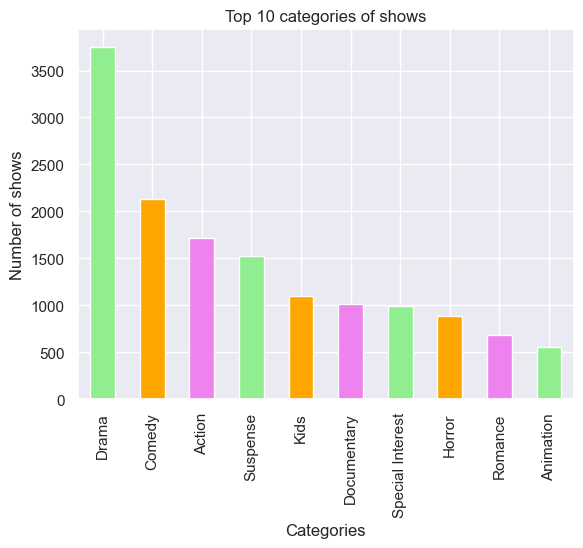

In [58]:
data_processed['Genre'].value_counts().head(10).plot(kind='bar',
                                                           title='Top 10 categories of shows',
                                                           color=['lightgreen','orange','violet'])
plt.xlabel('Categories')
plt.ylabel('Number of shows')



### save Final dataset

In [59]:
data_processed.to_csv('data/data_amazon_cleaned.csv')  #, index=False)

In [1]:
import pandas as pd

x = pd.read_csv('data/data_amazon_cleaned.csv')

C:\Users\201026268\AppData\Local\Temp\ipykernel_29748\1946438818.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
x[x['duration'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,Genre,description
